In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download iarunava/cell-images-for-detecting-malaria

 97% 658M/675M [00:04<00:00, 129MB/s]
100% 675M/675M [00:04<00:00, 147MB/s]


In [ ]:
! unzip cell-images-for-detecting-malaria.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import MaxPooling2D

In [ ]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split = 0.25)

test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.25)

In [ ]:
train_data = train_datagen.flow_from_directory('/content/cell_images/cell_images',
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 32,
                                           classes = ["Parasitized","Uninfected"],
                                           seed = 42,
                                           subset = "training"                                           
                                           )
test_data = test_datagen.flow_from_directory('/content/cell_images/cell_images',
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         classes = ["Parasitized","Uninfected"],
                                         batch_size = 32,
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 20670 images belonging to 2 classes.
Found 6888 images belonging to 2 classes.


In [ ]:
train_data

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_data,
  validation_data=test_data,
  epochs=20,
  steps_per_epoch=len(train_data),
  validation_steps=len(test_data)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
646/646 [==============================] - 249s 386ms/step - loss: 0.3070 - accuracy: 0.8846 - val_loss: 0.2271 - val_accuracy: 0.9300
Epoch 2/20
646/646 [==============================] - 247s 383ms/step - loss: 0.2010 - accuracy: 0.9372 - val_loss: 0.1824 - val_accuracy: 0.9422
Epoch 3/20
646/646 [==============================] - 245s 380ms/step - loss: 0.1853 - accuracy: 0.9410 - val_loss: 0.2367 - val_accuracy: 0.9352
Epoch 4/20
646/646 [==============================] - 248s 384ms/step - loss: 0.1708 - accuracy: 0.9459 - val_loss: 0.1602 - val_accuracy: 0.9403
Epoch 5/20
646/646 [==============================] - 250s 387ms/step - loss: 0.1640 - accuracy: 0.9475 - val_loss: 0.1529 - val_accuracy: 0.9483
Epoch 6/20
646/646 [==============================] - 247s 382ms/step - loss: 0.1516 - accuracy: 0.9525 - val_loss: 0.1802 - val_accuracy: 0.9454
Epoch 7/20
646/646 [==============================] - 247s 382ms/step - loss: 0.1460 - accuracy: 0.9557 - val_loss: 0.1551 -

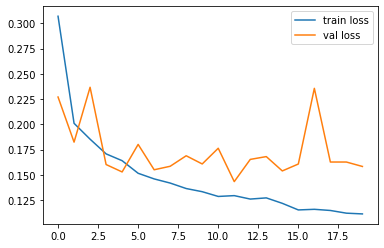

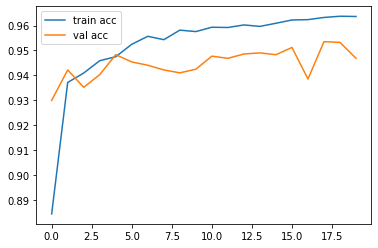

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('malaria_model.h5')

In [ ]:
y_pred = model.predict(test_data)

In [ ]:
y_pred

array([[9.9996483e-01, 3.5183504e-05],
       [5.0314172e-04, 9.9949682e-01],
       [9.9942964e-01, 5.7027600e-04],
       ...,
       [2.5781585e-04, 9.9974221e-01],
       [9.8801082e-01, 1.1989213e-02],
       [9.9252468e-01, 7.4752970e-03]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
img=image.load_img('/content/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_164.png',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
